In [12]:
import joblib
import numpy as np
import pandas as pd
import gc
import time
import os
import sys
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from contextlib import contextmanager
from lightgbm import LGBMClassifier
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from itertools import chain, product 
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tqdm.auto import tqdm
import random
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [13]:
pd.set_option('display.max_rows', 500)

# read data
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
snp_col = train.columns[train.columns.str.contains('SNP')].tolist()


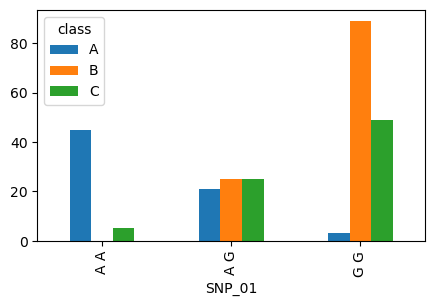

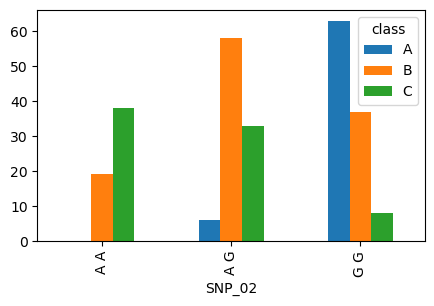

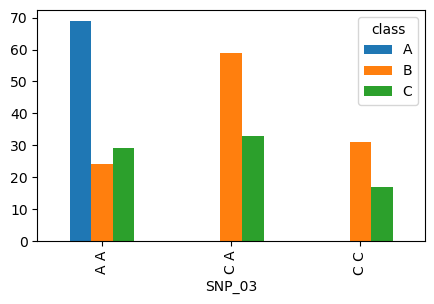

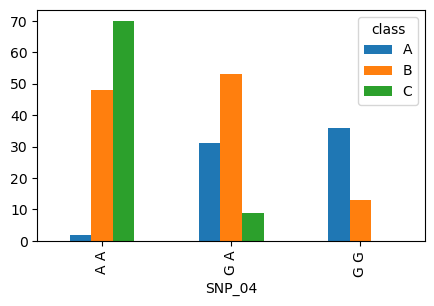

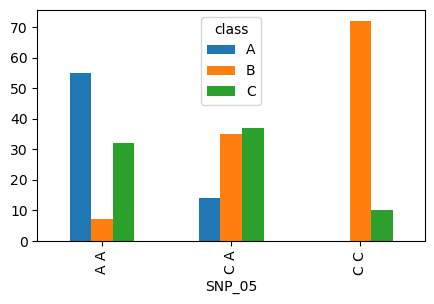

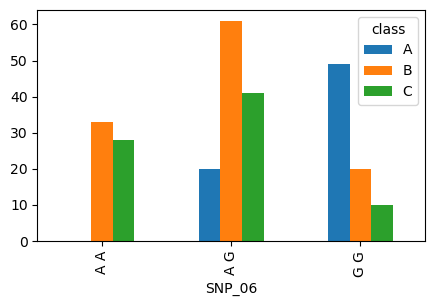

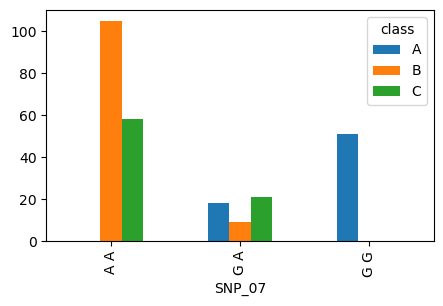

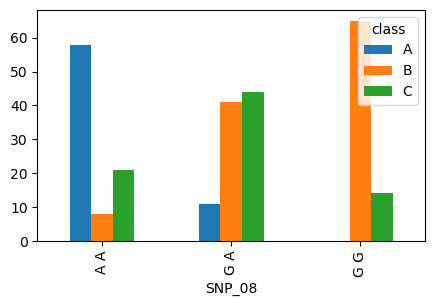

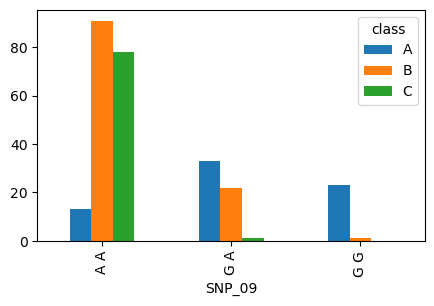

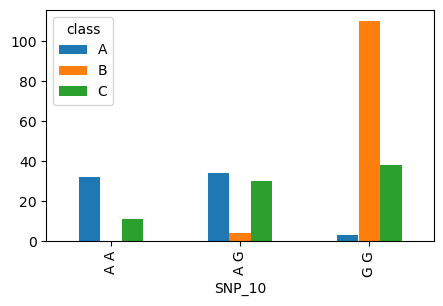

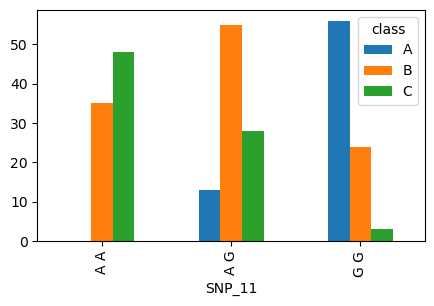

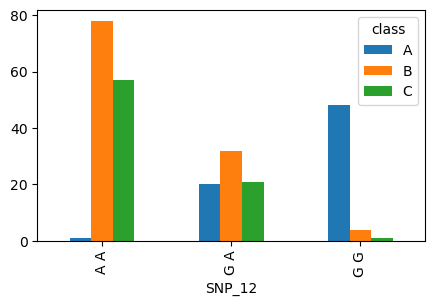

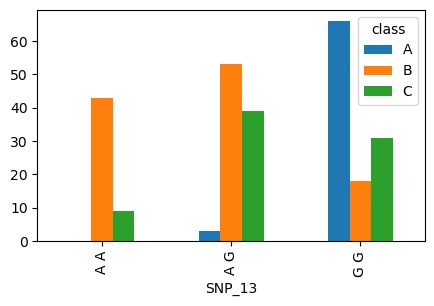

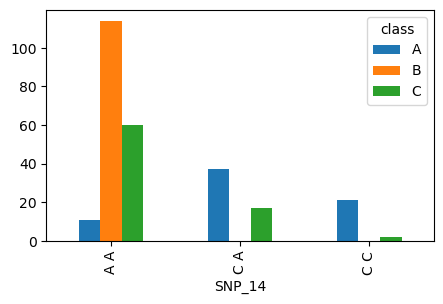

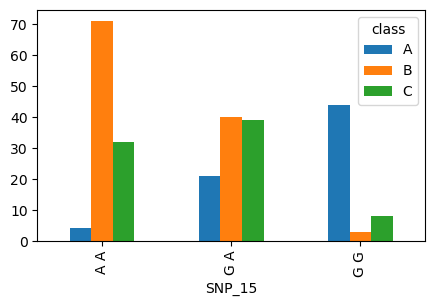

In [14]:
for g in train.columns[train.columns.str.contains('SNP')].tolist():
    train.groupby(g)['class'].value_counts().unstack().plot.bar(figsize=(5,3))


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
# provides train/test indices to split data in train/test sets.
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)



for train_idx, test_idx in split.split(train, train.iloc[:,3]):

    x_train = train.iloc[:,:-1].loc[train_idx]

    x_test = train.iloc[:,:-1].loc[test_idx]

    y_train = train.iloc[:,-1].loc[train_idx]

    y_test = train.iloc[:,-1].loc[test_idx]

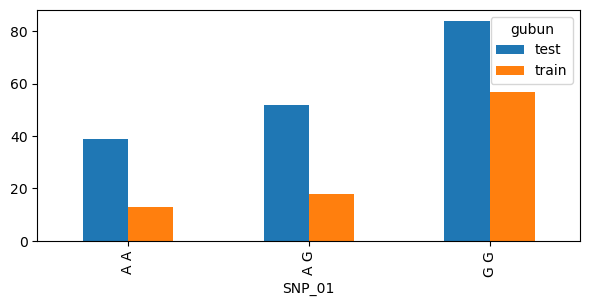

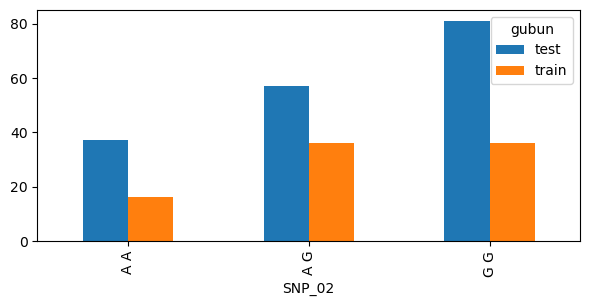

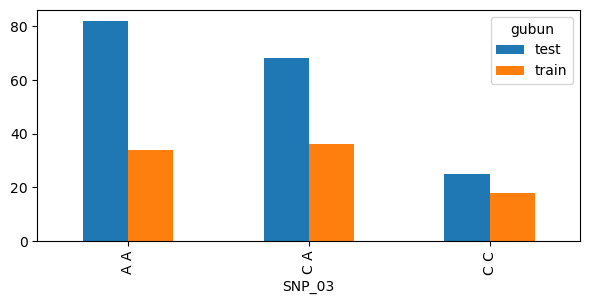

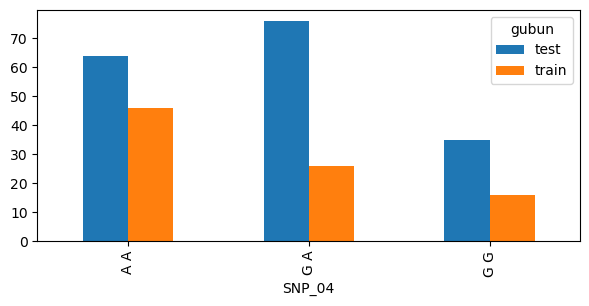

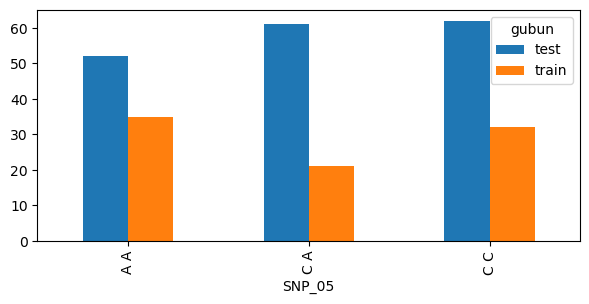

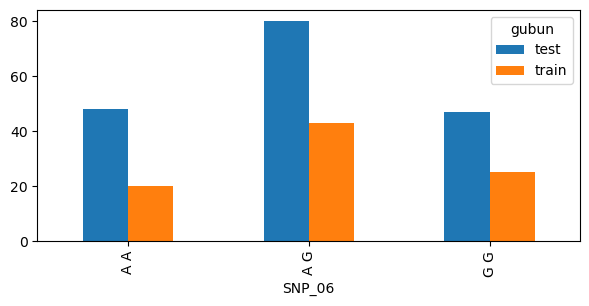

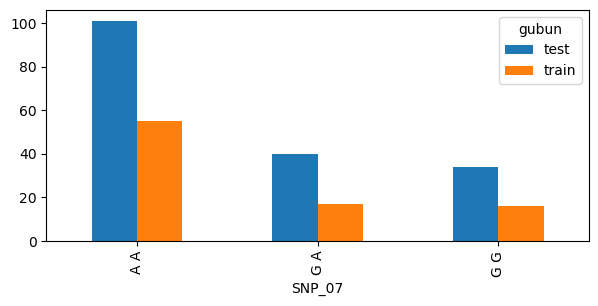

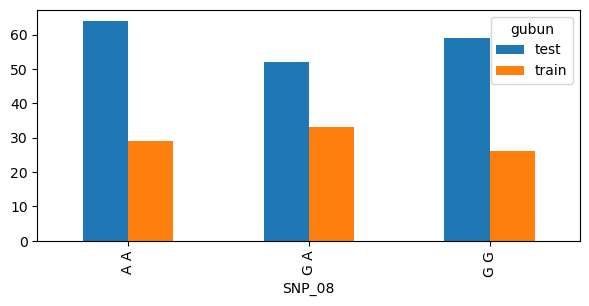

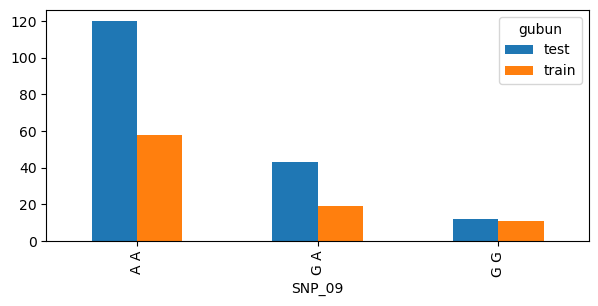

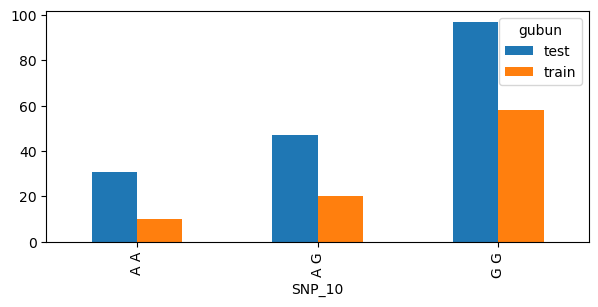

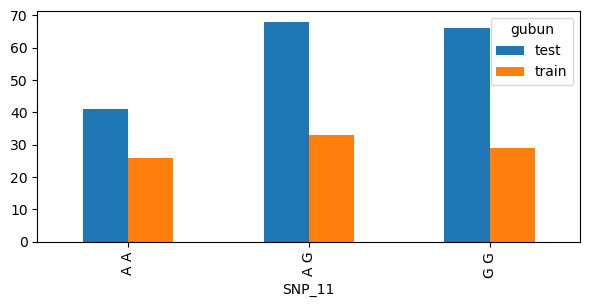

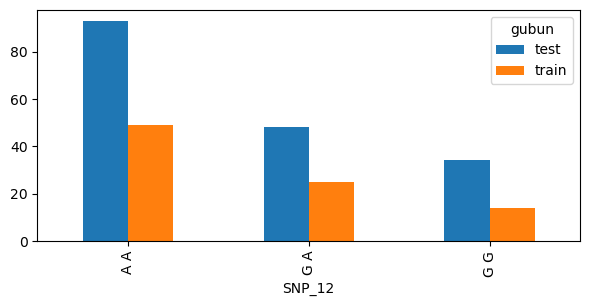

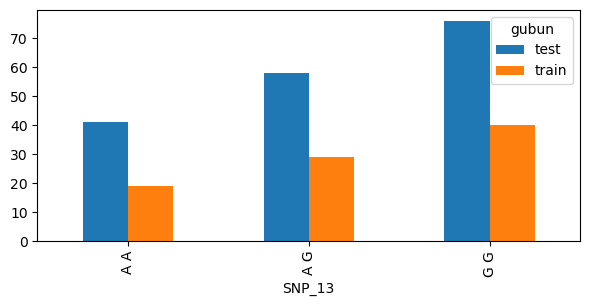

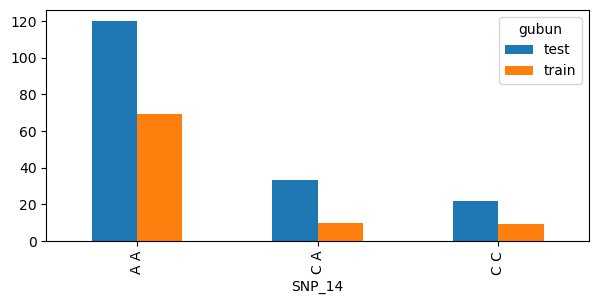

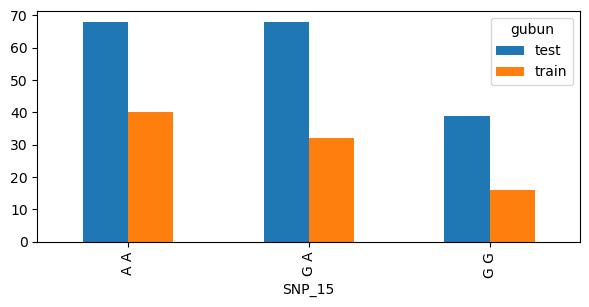

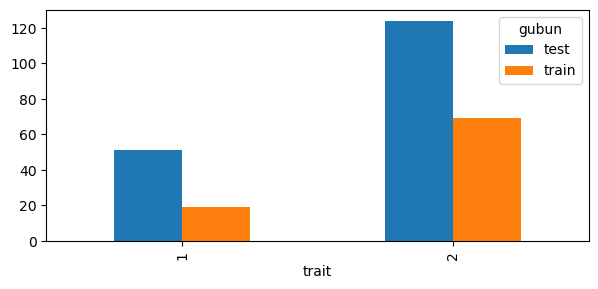

In [18]:
train['gubun'] = 'train'
test['gubun'] = 'test'
tmp = pd.concat([train[::3],test]).reset_index(drop=True)
for g in tmp.columns[tmp.columns.str.contains('SNP')].tolist()+['trait']:   
    tmp.groupby([g])['gubun'].value_counts().unstack().plot.bar(figsize=(7,3))
train = train.drop(columns='gubun')
test = test.drop(columns='gubun')

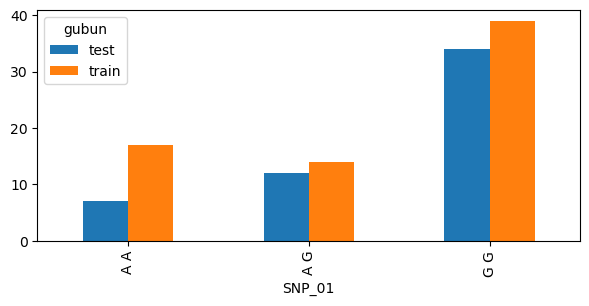

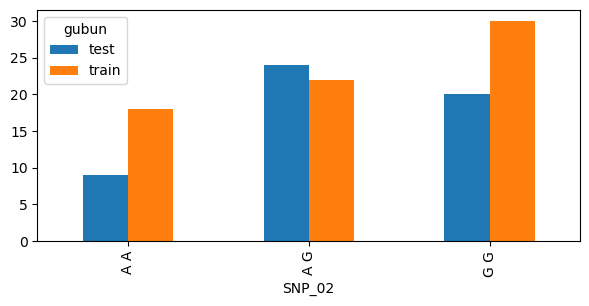

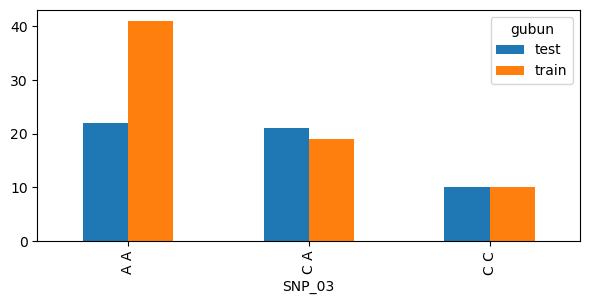

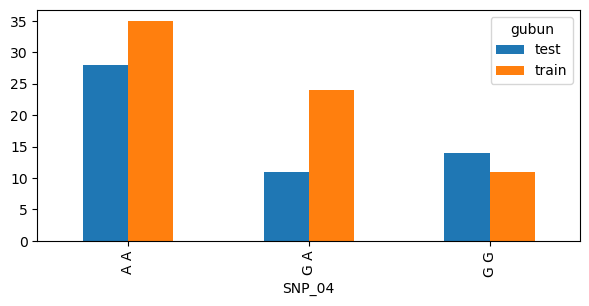

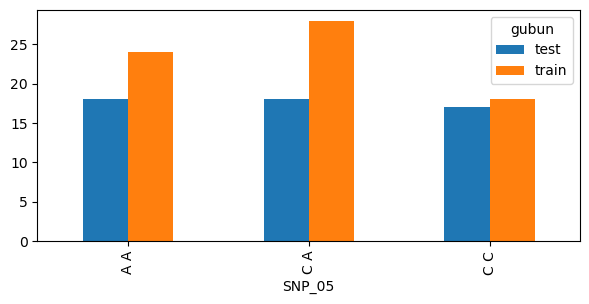

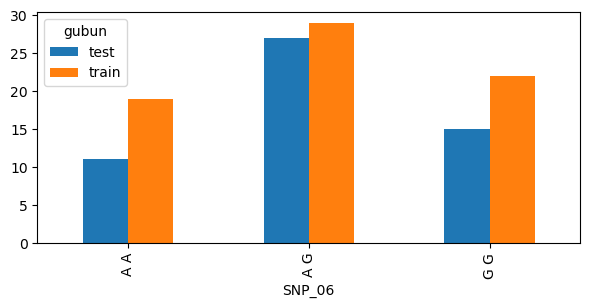

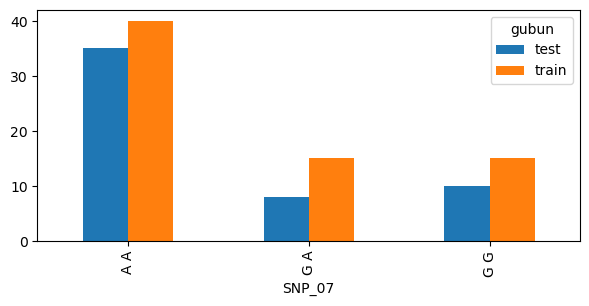

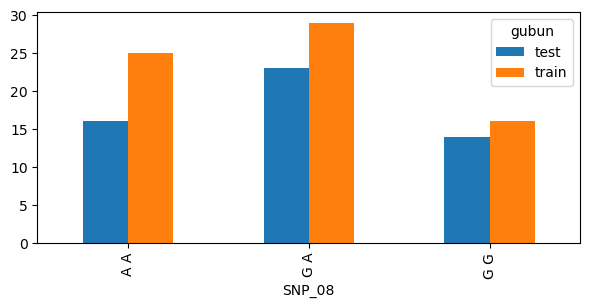

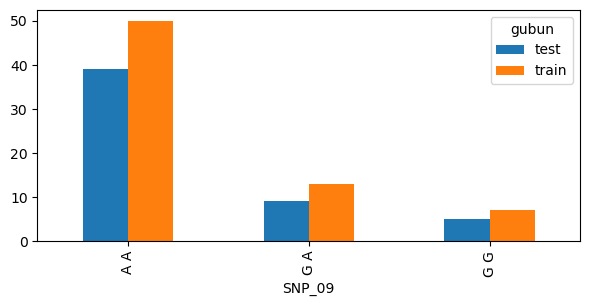

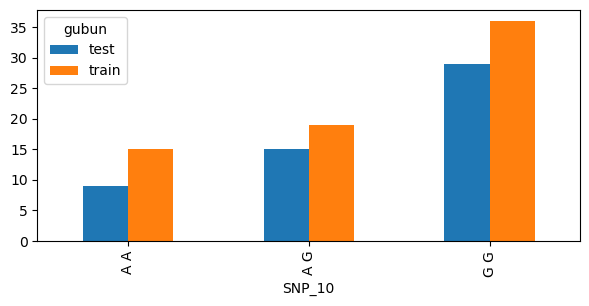

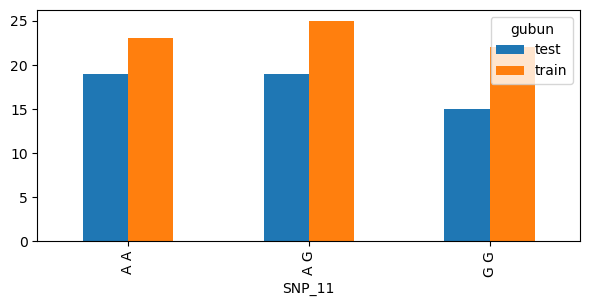

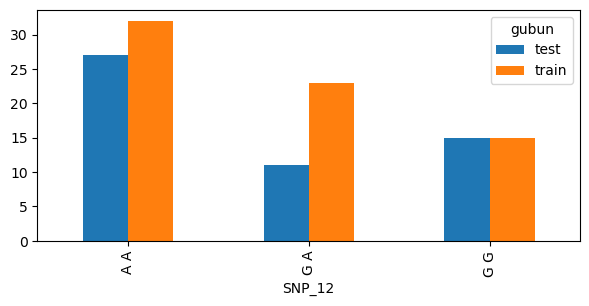

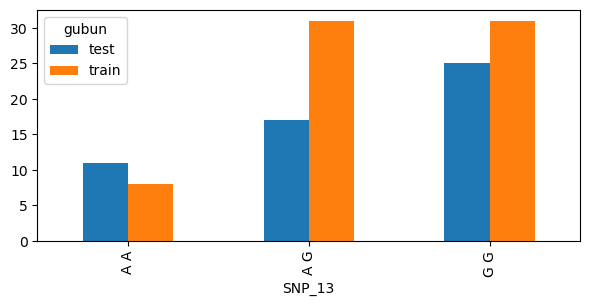

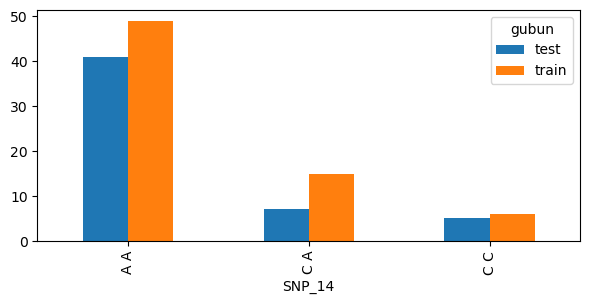

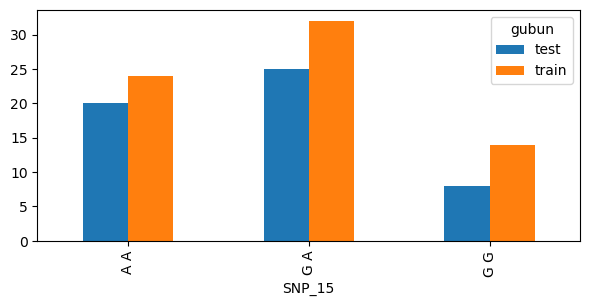

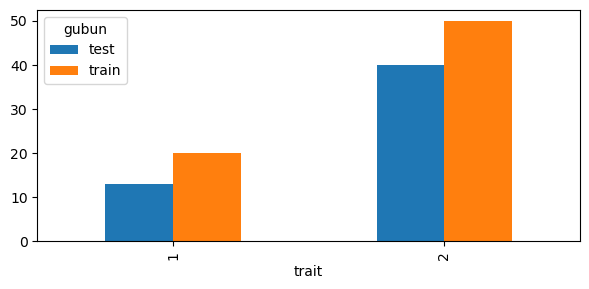

In [17]:
x_train['gubun'] = 'train'
x_test['gubun'] = 'test'
tmp = pd.concat([x_train[::3],x_test]).reset_index(drop=True)
for g in tmp.columns[tmp.columns.str.contains('SNP')].tolist()+['trait']:   
    tmp.groupby([g])['gubun'].value_counts().unstack().plot.bar(figsize=(7,3))
x_train = x_train.drop(columns='gubun')
x_test = x_test.drop(columns='gubun')